In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from skimage import io

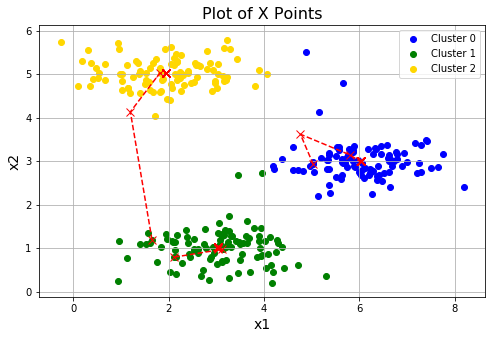

In [28]:
def findClosestCentroids(X, centroids):
    """
    output a one-dimensional array idx that holds the 
    index of the closest centroid to every training example.
    """
    idx = []
    max_dist = 1000000  # 限制一下最大距离
    for i in range(len(X)):
        minus = X[i] - centroids  # here use numpy's broadcasting
        dist = minus[:,0]**2 + minus[:,1]**2
        if dist.min() < max_dist:
            ci = np.argmin(dist)
            idx.append(ci)
    return np.array(idx)
def computeCentroids(X, idx):
    centroids = []
    for i in range(len(np.unique(idx))):  # np.unique() means K
        u_k = X[idx==i].mean(axis=0)  # 求每列的平均值
        centroids.append(u_k)
        
    return np.array(centroids)
def plotData(X, centroids, idx=None):
    """
    可视化数据，并自动分开着色。
    idx: 最后一次迭代生成的idx向量，存储每个样本分配的簇中心点的值
    centroids: 包含每次中心点历史记录
    """
    colors = ['b','g','gold','darkorange','salmon','olivedrab', 
              'maroon', 'navy', 'sienna', 'tomato', 'lightgray', 'gainsboro'
             'coral', 'aliceblue', 'dimgray', 'mintcream', 'mintcream']
    
    assert len(centroids[0]) <= len(colors), 'colors not enough '
      
    subX = []  # 分号类的样本点
    if idx is not None:
        for i in range(centroids[0].shape[0]):
            x_i = X[idx == i]
            subX.append(x_i)

    else:
        subX = [X]  # 将X转化为一个元素的列表，每个元素为每个簇的样本集，方便下方绘图
    
    # 分别画出每个簇的点，并着不同的颜色
    plt.figure(figsize=(8,5))    
    for i in range(len(subX)):
        xx = subX[i]
        plt.scatter(xx[:,0], xx[:,1], c=colors[i], label='Cluster %d'%i)
    plt.legend()
    plt.grid(True)
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.title('Plot of X Points',fontsize=16)
    
    # 画出簇中心点的移动轨迹
    xx, yy = [], []
    for centroid in centroids:
        xx.append(centroid[:,0])
        yy.append(centroid[:,1])
    
    plt.plot(xx, yy, 'rx--', markersize=8)
    
def initCentroids(X, K):
    m, n = X.shape
    idx = np.random.choice(m, K)
    centroids = X[idx]
    return centroids 

def runKmeans(X, centroids, max_iters):
    K = len(centroids)
    centroids_all = []
    centroids_all.append(centroids)
    centroid_i = centroids
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroid_i)
        centroid_i = computeCentroids(X, idx)
        centroids_all.append(centroid_i)
    
    return idx, centroids_all
mat = loadmat('ex7data2.mat')
X = mat['X']
init_centroids = initCentroids(X,3)
idx, centroids_all = runKmeans(X, init_centroids, 20)
plotData(X, centroids_all, idx)




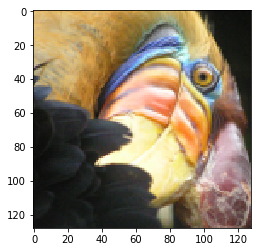

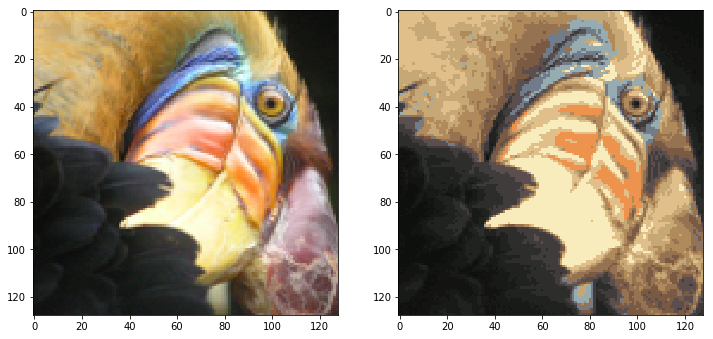

In [48]:
A = io.imread('bird_small.png')
plt.imshow(A);
A = A/255.  
X = A.reshape(-1, 3)
K = 16
centroids = initCentroids(X, K)
idx, centroids_all = runKmeans(X, centroids, 10)
img = np.zeros(X.shape)
centroids = centroids_all[-1]
for i in range(len(centroids)):
    img[idx == i] = centroids[i]
    
img = img.reshape((128, 128, 3))

fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].imshow(A)
axes[1].imshow(img)
